In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('bank-additional.csv',delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
df.duplicated().sum()
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [ ]:
# Conversion of categorical columns into numerical columns using label encoder.
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df1 = df.copy()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,12,1,1,2,0,2,0,0,6,0,...,1,20,0,1,3,8,4,156,6,0
1,21,7,2,3,0,0,0,1,6,0,...,3,20,0,1,8,18,16,207,8,0
2,7,7,1,3,0,2,0,1,4,4,...,0,20,0,1,9,23,8,225,10,0
3,20,7,1,2,0,1,1,1,4,0,...,2,20,0,1,9,23,8,222,10,0
4,29,0,1,6,0,2,0,0,7,1,...,0,20,0,1,7,11,7,201,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,...,0,20,0,1,9,17,6,221,10,0
4115,21,0,1,3,0,2,0,1,3,0,...,0,20,0,1,9,17,6,222,10,0
4116,9,8,2,3,0,0,0,0,6,1,...,1,20,1,0,3,8,4,160,6,0
4117,40,0,1,3,0,0,0,0,1,0,...,0,20,0,1,9,13,17,229,10,0


In [ ]:
df_encoded['deposit'].value_counts()

0    3668
1     451
Name: deposit, dtype: int64

In [ ]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 20)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 20)
(1030, 20)
(3089,)
(1030,)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  # Training Accuracy
    print('Testing Score',test_score)    # Testing Accuracy

# Building Decision Tree Classifier Model
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [ ]:
# Evaluating training and testing accuracy
mscore(dt1)
# Generating prediction
ypred_dt1 = dt1.predict(x_test)
# Evaluate the model - confusion matrix, classification Report, Accuaracy
eval_model(y_test,ypred_dt1)

Training Score 0.921333764972483
Testing Score 0.920388349514563
Accuracy_Score 0.920388349514563
Confusion Matrix
 [[909  21]
 [ 61  39]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       930
           1       0.65      0.39      0.49       100

    accuracy                           0.92      1030
   macro avg       0.79      0.68      0.72      1030
weighted avg       0.91      0.92      0.91      1030



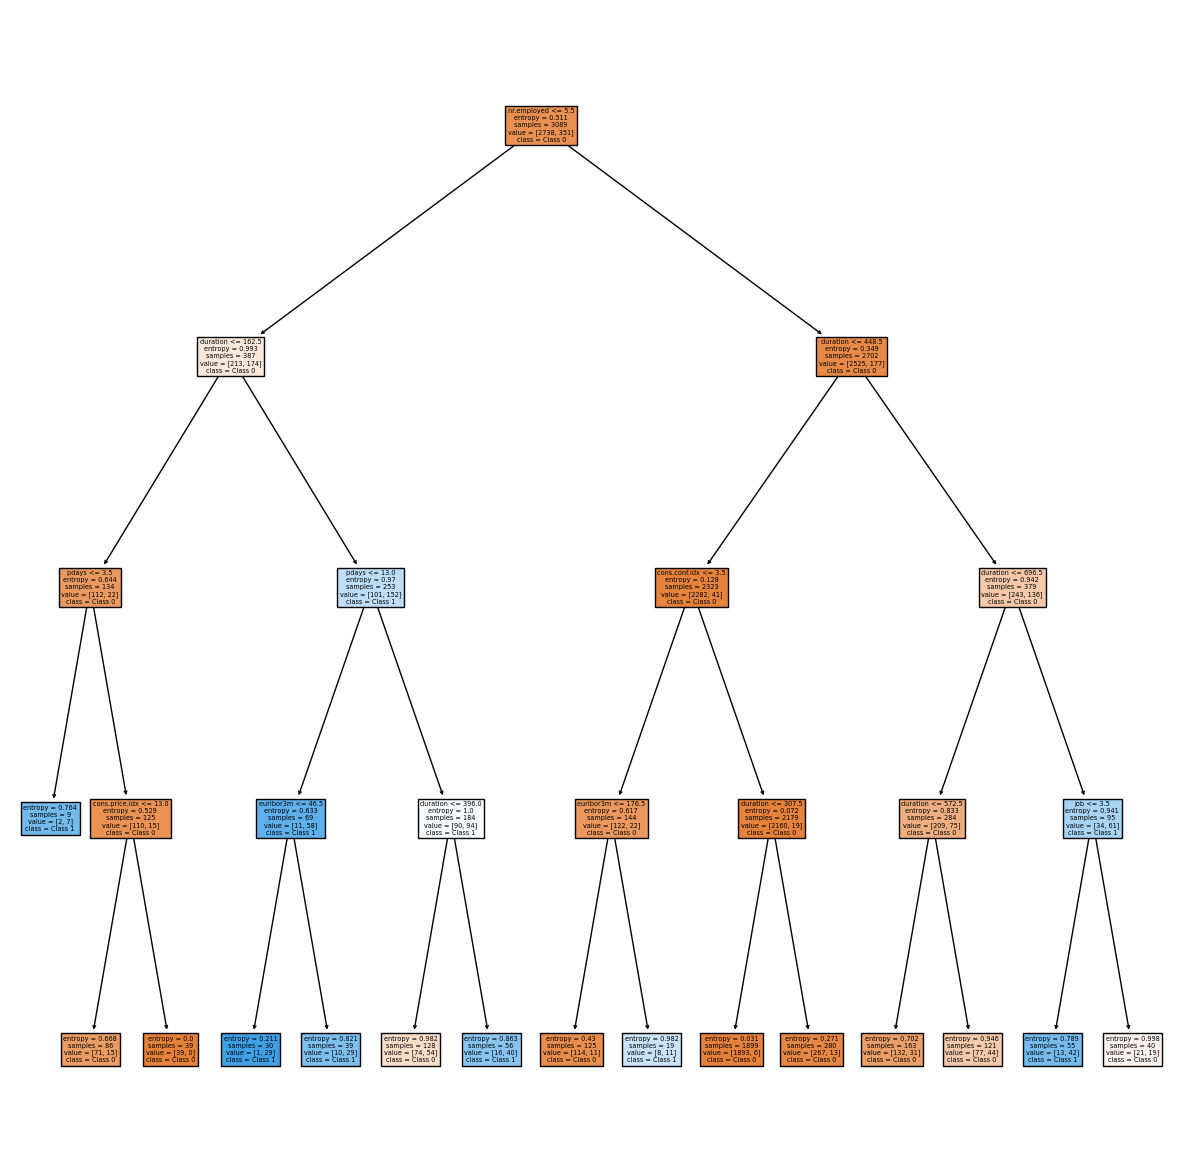

In [ ]:
fn = df.columns[:-1]  # Assuming the last column is the target variable
cn = ['Class 0', 'Class 1']  # Replace with your class names

plt.figure(figsize=(15, 15))
plot_tree(dt1, feature_names=fn.tolist(), class_names=cn, filled=True)  # Convert 'fn' to a list using .tolist()
plt.show()